In [237]:
import pandas as pd
from tqdm import tqdm
import torch
import numpy as np
from sklearn.cluster import KMeans
from transformers import pipeline
import umap.plot
import pickle as dill
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
import shap
import xgboost
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load + preprocess data

In [15]:
demo_data_path = "/Users/amulyagarimella/Documents/282finalproject/nlparam/applications/demo_math.json"

In [16]:
demo_data = pd.read_json(demo_data_path)[0].tolist()

In [155]:
vectorizer = CountVectorizer()
feats = vectorizer.fit_transform(demo_data)

In [185]:
feat_names = vectorizer.get_feature_names_out()

In [156]:
np.save('demo_math_countvectorizer_feats.npy', feats) 

# K-means cluster data + visualize in 2D

In [157]:
# Use 5 clusters to match NLParam demo
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(feats)

<Axes: >

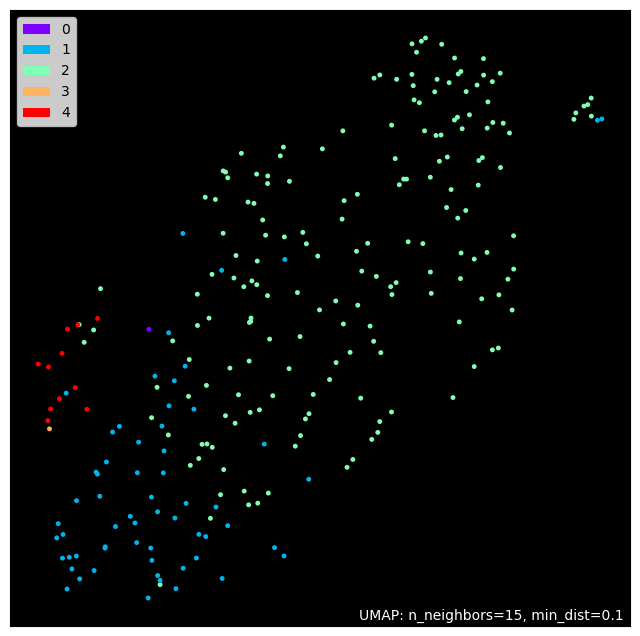

In [174]:
mapper = umap.UMAP().fit(feats)
umap.plot.points(mapper, labels=kmeans.labels_, theme="darkred")

In [238]:
silhouette_score(feats, kmeans.labels_)

0.05217142204290841

# Compute SHAP explanations for clusters

In [175]:
y = label_binarize(kmeans.labels_, classes=list(range(5)))
model = xgboost.XGBRegressor().fit(feats, y)

In [179]:
explainer = shap.Explainer(model)
shap_values = explainer(feats)
shap_values.feature_names = feat_names

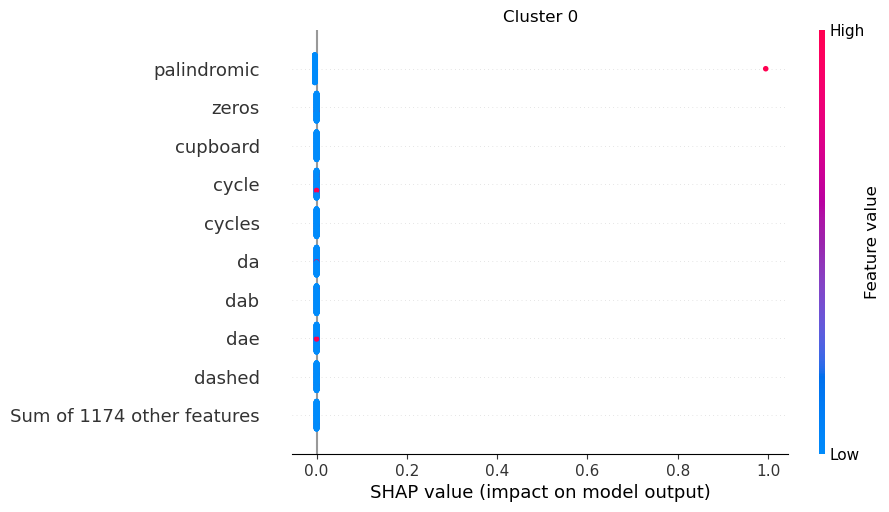

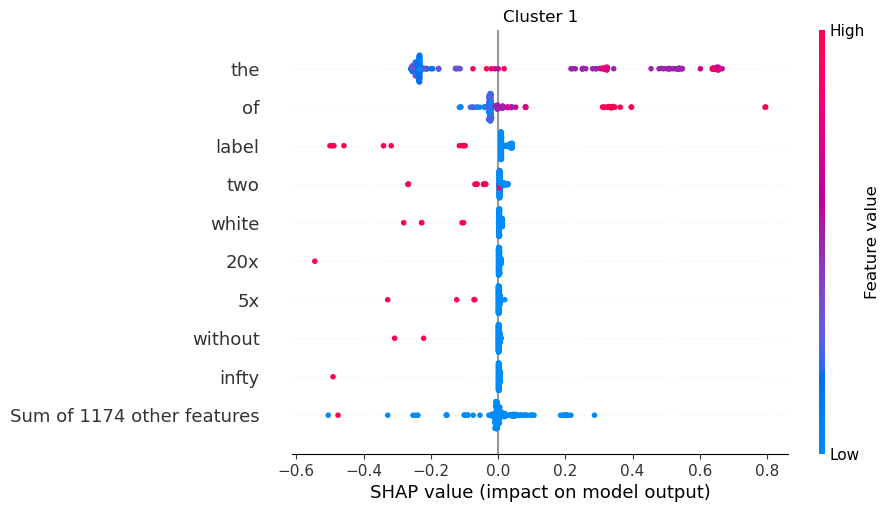

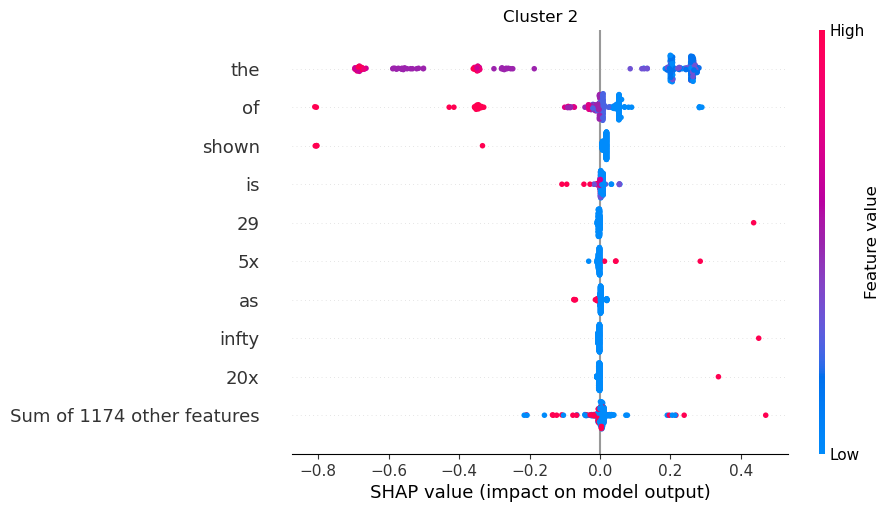

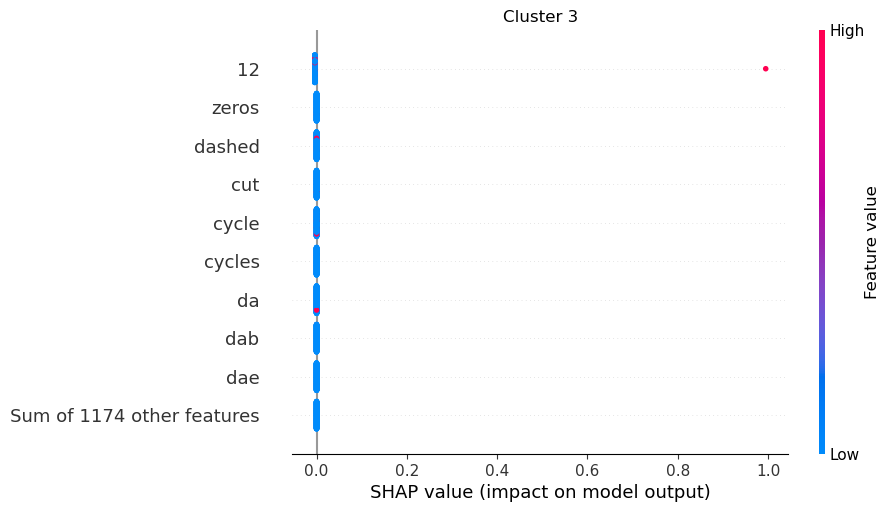

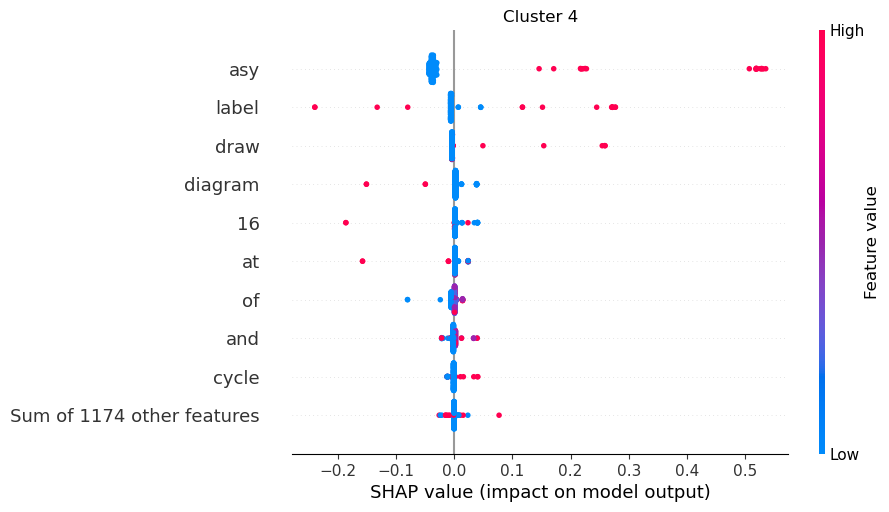

<Figure size 640x480 with 0 Axes>

In [235]:
for i in range(5):
    shap.plots.beeswarm(shap_values[:,:,i], show=False)
    plt.title(f"Cluster {i}")
    plt.show()
    plt.clf()